# Continuous Control

---

This report shows the results of training an agent to solve the Reacher environment using the Deep Deterministic Policy Gradient algorithm. We use the second version of the environment, training 20 agents in parallel.

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

Import the necessary libraries.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

from collections import deque
import torch
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import AgentParallel
from train import train

Load the environment. We will use the second version of the environment, training 20 agents in parallel.

In [3]:
# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Set a random seed to make experiments reproducible.

In [5]:
seed = 0

In [6]:
# function to plot the scores
def plot_scores(scores, plot_title = ""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.title(plot_title)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 4. Training the agent

To train the agent, we use the DDPG algorithm. In DDPG, the agent uses two networks: the critic and the actor network.

The critic learns the state value function $s -> V(s)$. The actor maps states to actions and learns which action to take in which state according to the optimal policy.

For both nets, the input layer size corresponds to the state size. We use a net with two hidden layers, each consisting of 128 nodes and a final output layer
In the critic net, the output layer consists of a single node corresponding to the approximated state value.
In the actor net, the output layer size corresponds to the number of parameters needed to specify an action. The output defines the best action to take in the given state according to the current policy.
In each step, the 20 agents act in parallel and all of their experiences are added to the replay memory.

To evaluate the performance, we sum up the rewards over each episode for each of the agents without discounting.
We then take the mean of these returns.
The environment is solved once the average over 100 episodes of this mean return is larger than 30.

We use the following hyperparameters for training:

* BUFFER_SIZE = int(1e5)     (replay buffer size)
* BATCH_SIZE = 256           (minibatch size)
* GAMMA = 1                  (discount factor)
* TAU = 1e-3                 (for soft update of target parameters)
* LR_ACTOR = 1e-5            (learning rate of the actor)
* LR_CRITIC = 1e-4           (learning rate of the critic)
* WEIGHT_DECAY = 0           (L2 weight decay)

* UPDATE_EVERY = 10          (number of steps between updates)
* NUMBER_UPDATES = 10        (number of gradient updates per update)
* ADD_NOISE = False          (whether to add noise when choosing actions)
* EPSILON = 0.01             (scaling of noise in case ADD_NOISE = True)

With these settings the agent is able to solve the environment within 222 episodes:


In [8]:
agent = AgentParallel(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=seed)

In [9]:
scores = train(agent, env, n_episodes = 1000, max_t = 1000, stop_when_solved=True)

Episode 1 	Score: 0.09
Episode 2 	Score: 0.08
Episode 3 	Score: 0.00
Episode 4 	Score: 0.05
Episode 5 	Score: 0.17
Episode 6 	Score: 0.41
Episode 7 	Score: 0.67
Episode 8 	Score: 0.56
Episode 9 	Score: 1.15
Episode 10 	Score: 0.31
Episode 11 	Score: 0.31
Episode 12 	Score: 0.53
Episode 13 	Score: 0.60
Episode 14 	Score: 0.65
Episode 15 	Score: 0.73
Episode 16 	Score: 0.91
Episode 17 	Score: 1.09
Episode 18 	Score: 1.00
Episode 19 	Score: 0.86
Episode 20 	Score: 1.08
Episode 21 	Score: 1.19
Episode 22 	Score: 1.25
Episode 23 	Score: 1.19
Episode 24 	Score: 1.67
Episode 25 	Score: 1.30
Episode 26 	Score: 1.14
Episode 27 	Score: 1.20
Episode 28 	Score: 0.96
Episode 29 	Score: 1.47
Episode 30 	Score: 1.51
Episode 31 	Score: 1.38
Episode 32 	Score: 1.75
Episode 33 	Score: 1.80
Episode 34 	Score: 1.95
Episode 35 	Score: 2.04
Episode 36 	Score: 1.86
Episode 37 	Score: 2.23
Episode 38 	Score: 2.18
Episode 39 	Score: 2.17
Episode 40 	Score: 1.93
Episode 41 	Score: 2.24
Episode 42 	Score: 2.19
E

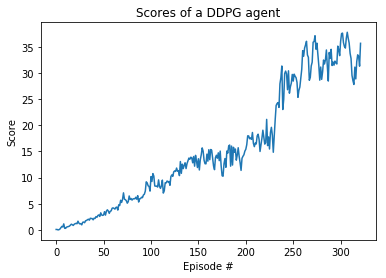

In [11]:
plot_scores(scores, "Scores of a DDPG agent")

In [12]:
env.close()

## Ideas for future work

We solved the tennis environment by training 20 parallel agents using the DDPG algorithm.
An average score of 30 over 100 episodes was reached within 222 episodes.

Ideas for further improvements:
* The experiments in this notebook were done with fixed hyperparameter settings. By carrying out a random hyperparameter search, we could determine better hyperparameter settings, leading to more efficient training.
* Try different network architectures
* We could train the agent using other algorithms like PPO or A2C and compare the results

## References


* the code for the DDPG algorithm builds on the implementation in Udacity's DRLND repository (https://github.com/udacity/deep-reinforcement-learning)
* DDPG: https://arxiv.org/abs/1509.02971